In [43]:
#required Libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #algorithm to predict stock prices
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # to evaluate the model


#download stock data of AAPL (Apple) from yfinance and then store it in a CSV file

ticker = 'AAPL'
# data = yf.download(ticker, start='2018-01-01', end=None)
 #Save the data from memory to a file
# data.to_csv('aapl_stock_data.csv')
data = pd.read_csv('aapl_stock_data.csv')

In [44]:
data.head(5)

,Date,Open,High,Low,Close,Volume
0,2018-01-02,39.933994,40.436220,39.722775,40.426830,102223600
1,2018-01-03,40.490183,40.964248,40.356415,40.419777,118071600
2,2018-01-04,40.492532,40.710791,40.384579,40.607529,89738400
3,2018-01-05,41.069859,41.156691,40.612224,40.703751,94640000
4,2018-01-08,40.917313,41.213014,40.818742,40.917313,82271200


In [45]:
# We want to predict the next day's 'Close', so we shift the 'Close' column up by one day and store it in new column name [next_close].
data['Next_Close'] = data['Close'].shift(-1)
# Drop the last row as it will have NaN value for 'Next_Close'
data.dropna(inplace=True)
data.shape


(1905, 7)

In [46]:
# Split the data into features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Next_Close'] #target variable

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression() # useing Linear Regression model beacause it can handle continuous data
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
predictions = model.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, predictions) #calculate the average error between actual and predicted values
mse = mean_squared_error(y_test, predictions) #calculate the average of the squared differences between actual and predicted values
r2 = r2_score(y_test, predictions) #calculate how well the model explains the features in the data and 1 means perfect prediction

print(f"Mean Absolute Error (MAE): ${mae:.2f}") 
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): $0.98
Mean Squared Error (MSE): 3.19
R-squared (R²): 1.00


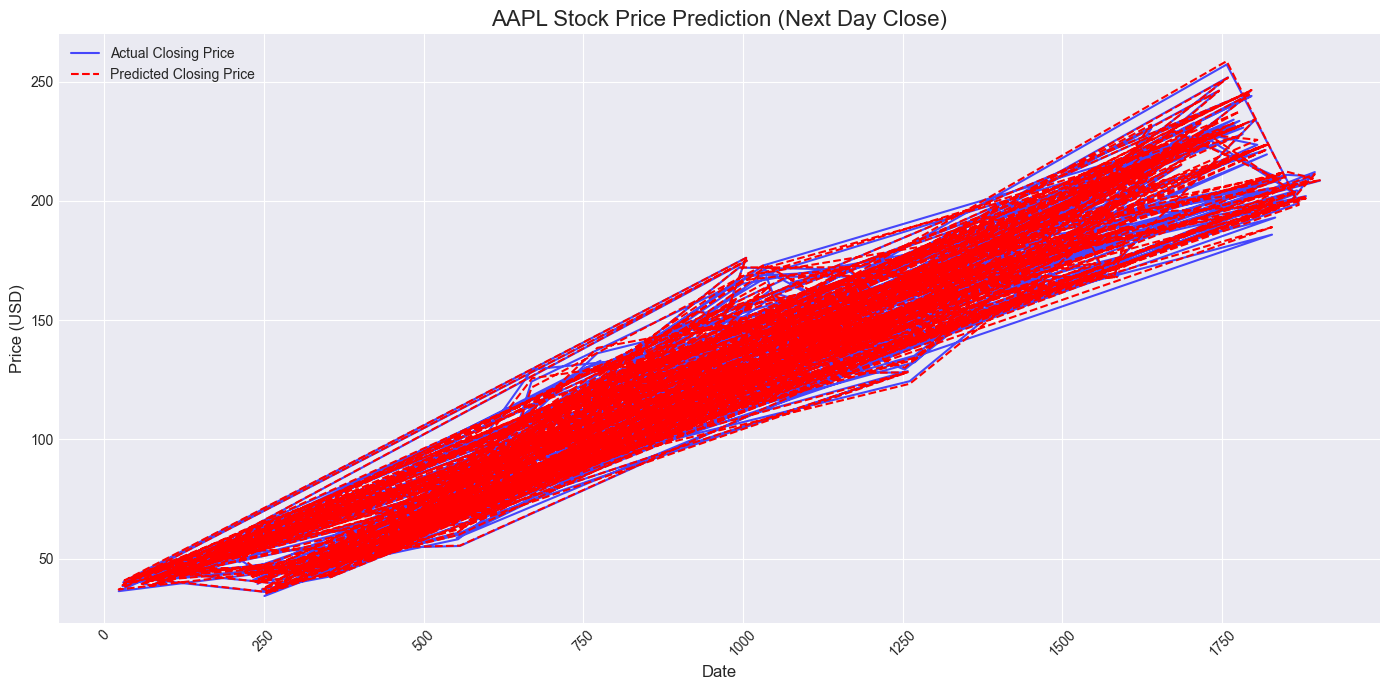

In [29]:
# 7. Plot the actual vs. predicted prices
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 7))

# Create a DataFrame for easy plotting with dates
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)

plt.plot(plot_df.index, plot_df['Actual'], label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(plot_df.index, plot_df['Predicted'], label='Predicted Closing Price', color='red', linestyle='--')

# Formatting the plot
plt.title(f'{ticker} Stock Price Prediction (Next Day Close)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# To predict tomorrow's closing price
# Get the latest data point (today's data)

latest_data = data[features].iloc[-1].to_numpy().reshape(1, -1)
predicted_tomorrow_price = model.predict(latest_data)

# Only if index is a datetime
print(f"\nToday's Data ({data.index[-1]}):")
print(data[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[-1])
print(f"\nPredicted Closing Price for Tomorrow: ${predicted_tomorrow_price[0]:.2f}")


Today's Data (1904):
Open      2.075700e+02
High      2.098400e+02
Low       2.071600e+02
Close     2.084900e+02
Volume    8.069840e+07
Name: 1904, dtype: float64

Predicted Closing Price for Tomorrow: $207.74


C:\Users\PCS\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
